In [ ]:
%pip install numpy
%pip install keras
%pip install matplotlib
%pip install tensorflow
%pip install seaborn

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import copy

In [ ]:
df = pd.read_csv("./wildfire_dataset.csv")
df

In [28]:
FSA_dict = {'C': [0, {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}], 
            'E': [0, {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}], 
            'H': [0, {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}], 
            'G': [0, {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}], 
            'L': [0, {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}], 
            'M': [0, {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}], 
            'P': [0, {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}], 
            'R': [0, {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}], 
            'S': [0, {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}], 
            'W': [0, {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}]}

causes_dict =  {'C': {'general_c': 0, 'activity_c': 0, 'true_c': 0}, 
                'E': {'general_c': 0, 'activity_c': 0, 'true_c': 0}, 
                'H': {'general_c': 0, 'activity_c': 0, 'true_c': 0}, 
                'G': {'general_c': 0, 'activity_c': 0, 'true_c': 0}, 
                'L': {'general_c': 0, 'activity_c': 0, 'true_c': 0}, 
                'M': {'general_c': 0, 'activity_c': 0, 'true_c': 0}, 
                'P': {'general_c': 0, 'activity_c': 0, 'true_c': 0}, 
                'R': {'general_c': 0, 'activity_c': 0, 'true_c': 0}, 
                'S': {'general_c': 0, 'activity_c': 0, 'true_c': 0}, 
                'W': {'general_c': 0, 'activity_c': 0, 'true_c': 0}}

In [29]:
g_causes = {}
a_causes = {}
t_causes = {}

for index in df.index:
    general = df.loc[index, 'general_cause_desc']
    activity = df.loc[index, 'activity_class']
    true_c = df.loc[index, 'true_cause']

    if (general not in g_causes):
        g_causes[general] = [0, {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}]
    if (activity not in a_causes):
        a_causes[activity] = [0, {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}]
    if (true_c not in t_causes):
        
        t_causes[true_c] = [0, {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}]

for key, value in causes_dict.items():
    causes_dict[key]['general_c'] = copy.deepcopy(g_causes)
    causes_dict[key]['activity_c'] = copy.deepcopy(a_causes)
    causes_dict[key]['true_c'] = copy.deepcopy(t_causes)

In [30]:
for index in df.index: 

    region = df.loc[index, 'fire_number']
    region = region[:1]
    FSA_dict[region][0] +=1
    classtemp = df.loc[index, 'size_class']
    FSA_dict[region][1][classtemp] += 1

    general = df.loc[index, 'general_cause_desc']
    causes_dict[region]['general_c'][general][0] += 1
    causes_dict[region]['general_c'][general][1][classtemp] += 1
    activity = df.loc[index, 'activity_class']
    causes_dict[region]['activity_c'][activity][0] += 1
    causes_dict[region]['activity_c'][activity][1][classtemp] += 1
    true_c = df.loc[index, 'true_cause']
    causes_dict[region]['true_c'][true_c][0] += 1
    causes_dict[region]['true_c'][true_c][1][classtemp] += 1

In [80]:
g_causes_list = list(g_causes.keys())
a_causes_list = list(a_causes.keys())
t_causes_list = list(t_causes.keys())
ge = {}
ac = {}
tr = {}

for index in range(len(g_causes_list)):
    ge[g_causes_list[index]] = 0
for index in range(len(a_causes_list)):
    ac[a_causes_list[index]] = 0
for index in range(len(t_causes_list)):
    tr[t_causes_list[index]] = 0

size_general_dict = {'A': ge, 'B': ge, 'C': ge, 'D': ge, 'E': ge}
size_activity_dict = {'A': ac, 'B': ac, 'C': ac, 'D': ac, 'E': ac}
size_true_dict = {'A': tr, 'B': tr, 'C': tr, 'D': tr, 'E': tr}

for key, value in size_general_dict.items():
    size_general_dict[key] = copy.deepcopy(ge)

for key, value in size_activity_dict.items():
    size_activity_dict[key] = copy.deepcopy(ac)

for key, value in size_true_dict.items():
    size_true_dict[key] = copy.deepcopy(tr)

for key,value in causes_dict.items():
    for l,t in value['general_c'].items():
        temp = 0
        for k,v in t[1].items():
            size_general_dict[k][l] += v

for key,value in causes_dict.items():
    for l,t in value['activity_c'].items():
        temp = 0
        for k,v in t[1].items():
            size_activity_dict[k][l] += v

for key,value in causes_dict.items():
    for l,t in value['true_c'].items():
        temp = 0
        for k,v in t[1].items():
            size_true_dict[k][l] += v


print(size_general_dict)
print(size_activity_dict)
print(size_true_dict)


{'A': {'Lightning': 4398, 'Forest Industry': 303, 'Incendiary': 1082, 'Resident': 2661, 'Recreation': 4837, 'Agriculture Industry': 288, 'Government': 69, 'Power Line Industry': 751, 'Oil & Gas Industry': 254, 'Undetermined': 439, 'Railroad': 56, 'Other Industry': 211, 'Under Investigation': 0, 'Prescribed Fire': 10, 'Restart': 43}, 'B': {'Lightning': 2467, 'Forest Industry': 93, 'Incendiary': 792, 'Resident': 1081, 'Recreation': 318, 'Agriculture Industry': 159, 'Government': 39, 'Power Line Industry': 351, 'Oil & Gas Industry': 130, 'Undetermined': 239, 'Railroad': 61, 'Other Industry': 72, 'Under Investigation': 0, 'Prescribed Fire': 6, 'Restart': 17}, 'C': {'Lightning': 564, 'Forest Industry': 14, 'Incendiary': 89, 'Resident': 172, 'Recreation': 58, 'Agriculture Industry': 39, 'Government': 3, 'Power Line Industry': 44, 'Oil & Gas Industry': 12, 'Undetermined': 45, 'Railroad': 8, 'Other Industry': 8, 'Under Investigation': 0, 'Prescribed Fire': 1, 'Restart': 3}, 'D': {'Lightning': 

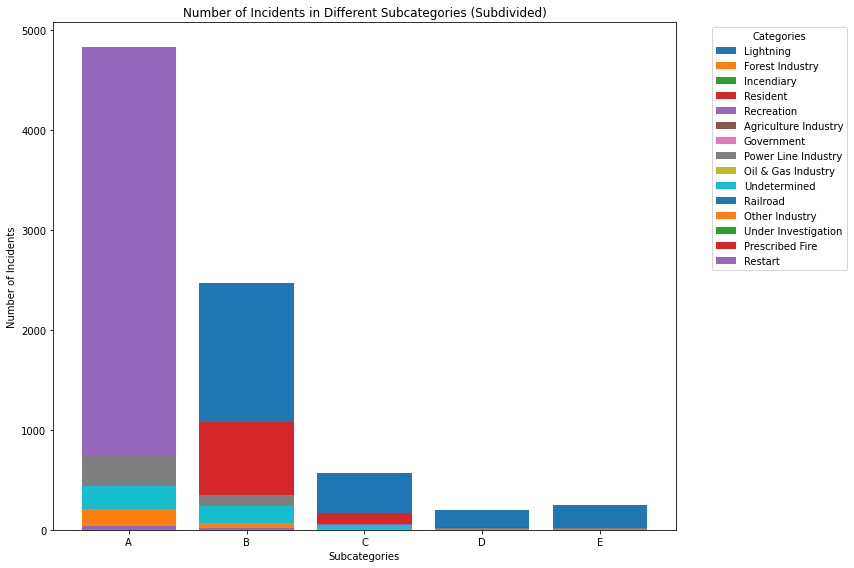

In [78]:
categories = list(size_general_dict['A'].keys())
subcategories = list(size_general_dict.keys())

fig, ax = plt.subplots(figsize=(12, 8))

for category in categories:
    values = [size_general_dict[subcategory][category] for subcategory in subcategories]
    ax.bar(subcategories, values, label=category)

ax.set_xlabel('Subcategories')
ax.set_ylabel('Number of Incidents')
ax.set_title('Number of Incidents in Different Subcategories (Subdivided)')
ax.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



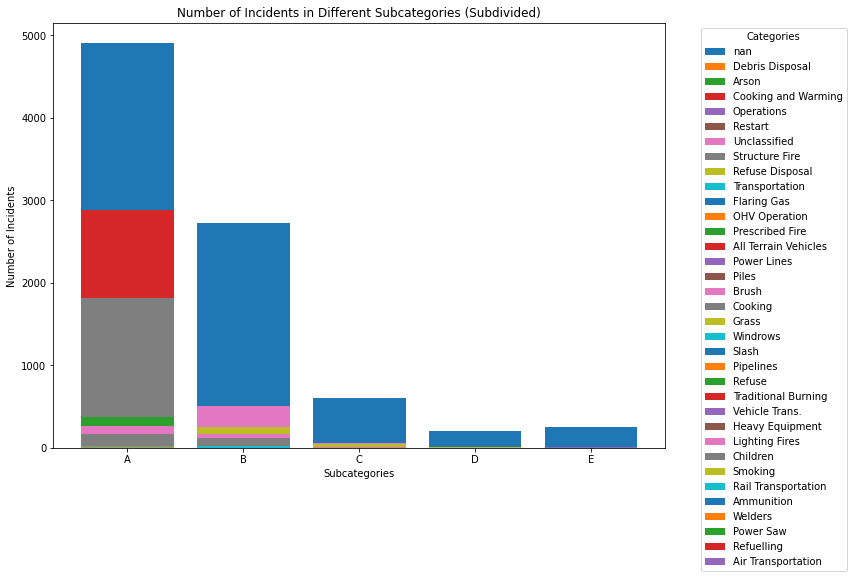

In [81]:
categories = list(size_activity_dict['A'].keys())
subcategories = list(size_activity_dict.keys())

fig, ax = plt.subplots(figsize=(12, 8))

for category in categories:
    values = [size_activity_dict[subcategory][category] for subcategory in subcategories]
    ax.bar(subcategories, values, label=category)

ax.set_xlabel('Subcategories')
ax.set_ylabel('Number of Incidents')
ax.set_title('Number of Incidents in Different Subcategories (Subdivided)')
ax.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

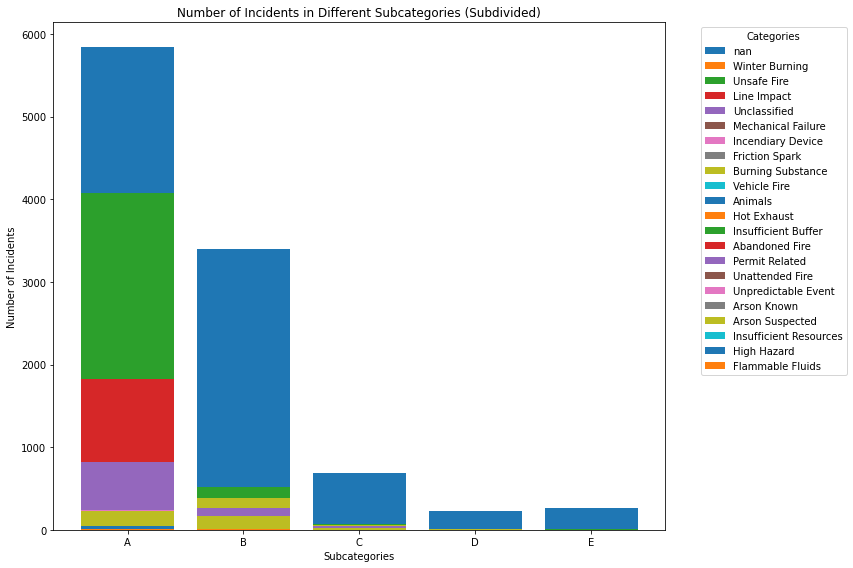

In [82]:
categories = list(size_true_dict['A'].keys())
subcategories = list(size_true_dict.keys())

fig, ax = plt.subplots(figsize=(12, 8))

for category in categories:
    values = [size_true_dict[subcategory][category] for subcategory in subcategories]
    ax.bar(subcategories, values, label=category)

ax.set_xlabel('Subcategories')
ax.set_ylabel('Number of Incidents')
ax.set_title('Number of Incidents in Different Subcategories (Subdivided)')
ax.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [11]:
g_causes_total = {}
a_causes_total = {}
for key,value in causes_dict.items():
    temp = {}
    for k,v in value['general_c'].items():
        try:
            temp[k] = v[0]
        except(KeyError):
            break
    g_causes_total[key] = temp

a_causes_total = {}
for key,value in causes_dict.items():
    temp = {}
    for k,v in value['activity_c'].items():
        try:
            temp[k] = v[0]
        except(KeyError):
            break
    a_causes_total[key] = temp


t_causes_total = {}
for key,value in causes_dict.items():
    temp = {}
    for k,v in value['true_c'].items():
        try:
            temp[k] = v[0]
        except(KeyError):
            break
    t_causes_total[key] = temp

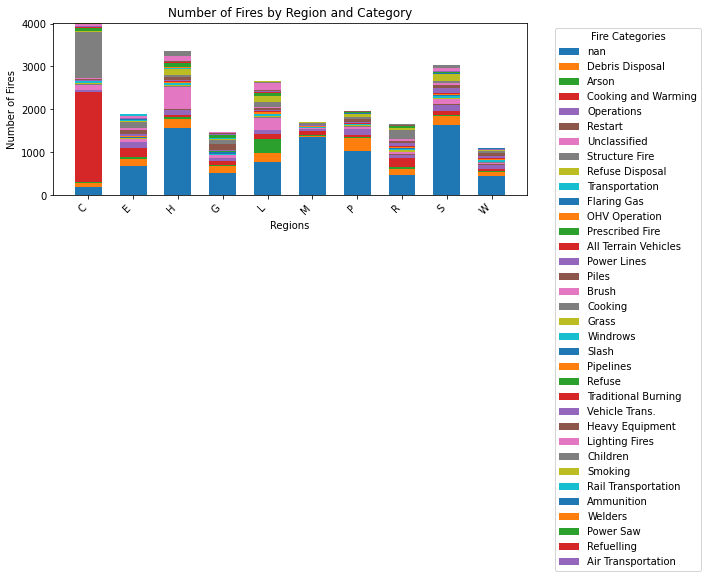

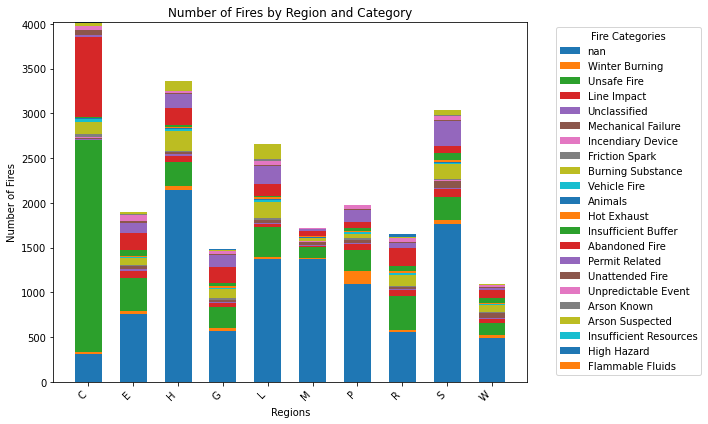

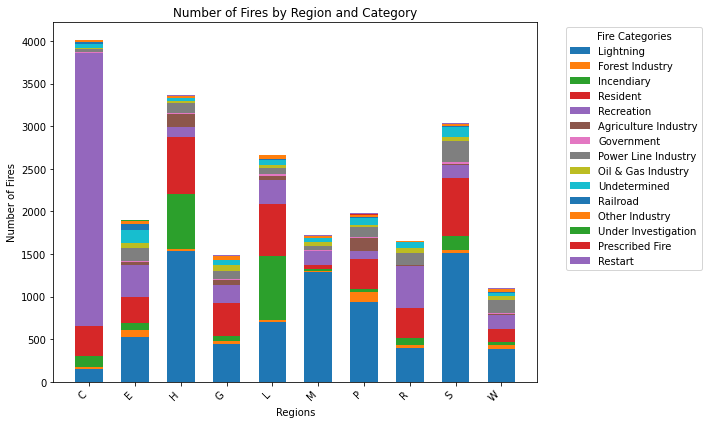

In [20]:
categories = list(a_causes_total['C'].keys())
labels = list(a_causes_total.keys())
num_categories = len(categories)

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.6

for i, category in enumerate(categories):
   
    values = [a_causes_total[label][category] for label in labels]
       
    bottom_values = [sum(a_causes_total[label][categories[j]] for j in range(i)) for label in labels]

    ax.bar(labels, values, width=bar_width, label=category, bottom=bottom_values)

ax.set_ylabel('Number of Fires')
ax.set_xlabel('Regions')  # Flipped: Set x-axis label to 'Regions'
ax.set_title('Number of Fires by Region and Category')
ax.legend(title='Fire Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

categories = list(t_causes_total['C'].keys())
labels = list(t_causes_total.keys())
num_categories = len(categories)

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.6

for i, category in enumerate(categories):
   
    values = [t_causes_total[label][category] for label in labels]
       
    bottom_values = [sum(t_causes_total[label][categories[j]] for j in range(i)) for label in labels]

    ax.bar(labels, values, width=bar_width, label=category, bottom=bottom_values)

ax.set_ylabel('Number of Fires')
ax.set_xlabel('Regions')  # Flipped: Set x-axis label to 'Regions'
ax.set_title('Number of Fires by Region and Category')
ax.legend(title='Fire Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

categories = list(g_causes_total['C'].keys())
labels = list(g_causes_total.keys())
num_categories = len(categories)

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.6

for i, category in enumerate(categories):
   
    values = [g_causes_total[label][category] for label in labels]
       
    bottom_values = [sum(g_causes_total[label][categories[j]] for j in range(i)) for label in labels]

    ax.bar(labels, values, width=bar_width, label=category, bottom=bottom_values)

ax.set_ylabel('Number of Fires')
ax.set_xlabel('Regions')  # Flipped: Set x-axis label to 'Regions'
ax.set_title('Number of Fires by Region and Category')
ax.legend(title='Fire Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
weights = {'A': 0.1, 'B': 4.0, 'C': 20.0, 'D': 200.0, 'E': 1961.53}
weighted_FSA = {'C': 0, 'E': 0, 'H': 0, 'G': 0, 'L': 0, 'M': 0, 'P': 0, 'R': 0, 'S': 0, 'W': 0}

for key, value in FSA_dict.items():
    for k, w in weights.items():
        weighted_FSA[key] += value[1][k]*weights[k]

print(weighted_FSA)    


{'C': 6535.360000000001, 'E': 29056.66, 'H': 257480.41999999998, 'G': 11845.92, 'L': 54439.92999999999, 'M': 193238.13, 'P': 48173.1, 'R': 26269.129999999997, 'S': 102352.62, 'W': 14546.18}


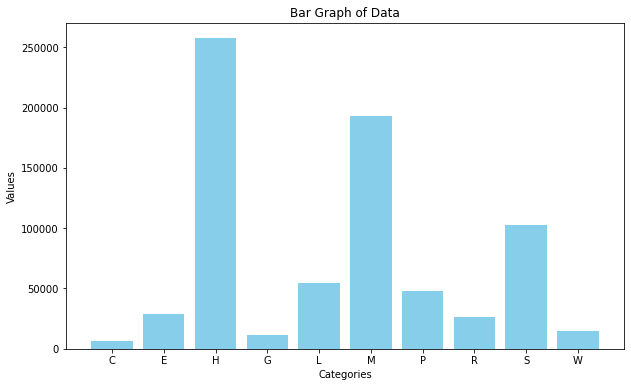

In [16]:
categories = list(weighted_FSA.keys())
values = list(weighted_FSA.values())

# Creating the bar graph
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue')
plt.title('Bar Graph of Data')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

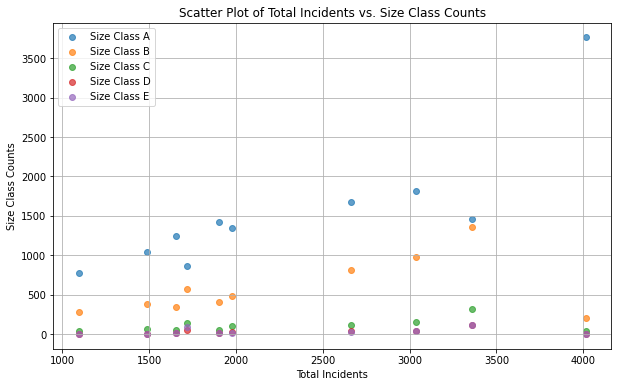

In [17]:
fsa_codes = list(FSA_dict.keys())
total_incidents = [data[0] for data in FSA_dict.values()]
size_class_counts = {cls: [data[1][cls] for data in FSA_dict.values()] for cls in ['A', 'B', 'C', 'D', 'E']}

plt.figure(figsize=(10, 6))
for cls, counts in size_class_counts.items():
    plt.scatter(total_incidents, counts, label=f'Size Class {cls}', alpha=0.7)

plt.title('Scatter Plot of Total Incidents vs. Size Class Counts')
plt.xlabel('Total Incidents')
plt.ylabel('Size Class Counts')
plt.legend()
plt.grid(True)
plt.show()

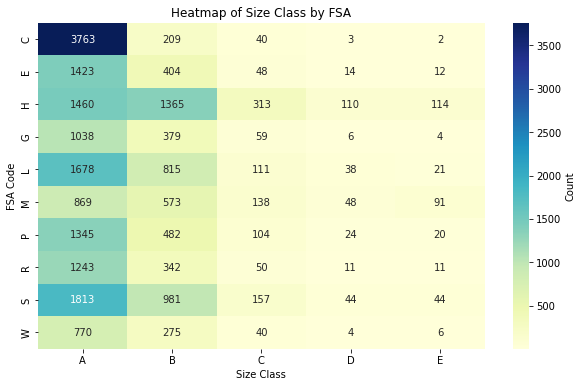

In [49]:
df = pd.DataFrame(FSA_dict).T
df.columns = ['Total', 'Size Class Count']

# Extracting Size Class information
size_class = df.columns

df = df['Size Class Count'].apply(pd.Series)

# Count of Size Classes
count_size_classes = len(df.columns)

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Count'})
plt.title('Heatmap of Size Class by FSA')
plt.xlabel('Size Class')
plt.ylabel('FSA Code')
plt.show()



<Figure size 720x432 with 0 Axes>

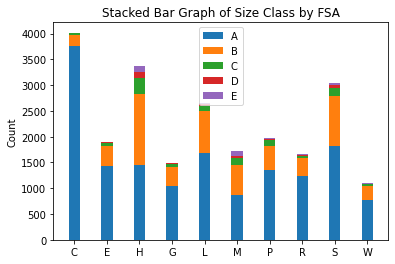

In [51]:
labels = list(FSA_dict.keys())
classes = list(FSA_dict[labels[0]][1].keys())
data = [[FSA_dict[fsa][1][cls] for fsa in labels] for cls in classes]

fig, ax = plt.subplots()
width = 0.35
ind = np.arange(len(labels))
bottom = np.zeros(len(labels))
for i, cls in enumerate(classes):
    ax.bar(ind, data[i], width, bottom=bottom, label=cls)
    bottom += np.array(data[i])

ax.set_ylabel('Count')
ax.set_title('Stacked Bar Graph of Size Class by FSA')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()
plt.show()